In [2]:
import matplotlib.pyplot as plt
import math 
import numpy as np
# import quaternion

In [3]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, ax_s):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_s.tick_params(labelleft=False, labelbottom=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax_s.scatter(y, x)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

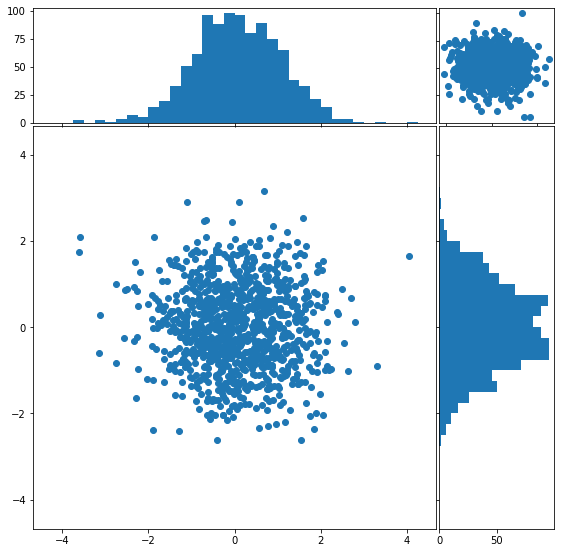

In [4]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# definitions for the axes
left, width = 0, 0.7
bottom, height = 0, 0.7
spacing = 0.005
mw,mh=0.2,0.2
len0,space,len1 = 0.65,0.005,0.2


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, mw]
rect_histy = [left + width + spacing, bottom, mw, height]
rect_scot = [left + width + spacing, bottom + height + spacing, mw, mh]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax_s = fig.add_axes(rect_scot)
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy, ax_s)

plt.show()

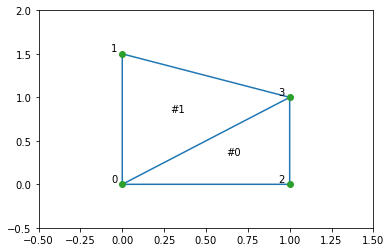

In [147]:
from scipy.spatial import Delaunay
points = np.array([[0, 0], [0, 1.5], [1, 0], [1, 1]])
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
plt.xlim(-0.5, 1.5); plt.ylim(-0.5, 2)
plt.show()

In [ ]:
class Tri:
  def __init__(self, points, color):
    self.points = points
    self.color = color


In [30]:
def quaternionPair(a,v):
    q_a = math.cos(a/2)*np.eye(4)
    q_b = math.sin(a/2)*v[0]*np.array([[0,-1,0,0],[1,0,0,0],[0,0,0,-1],[0,0,1,0]])
    q_c = math.sin(a/2)*v[1]*np.array([[0,0,-1,0],[0,0,0,1],[1,0,0,0],[0,-1,0,0]])
    q_d = math.sin(a/2)*v[2]*np.array([[0,0,0,-1],[0,0,-1,0],[0,1,0,0],[1,0,0,0]])
    q = q_a+q_b+q_c+q_d
    return q,np.linalg.inv(q)

In [163]:
def normV(v):
    return v / np.linalg.norm(v)

In [155]:
def cube(v,r):
    da = np.array([r,0,0])
    db = np.array([0,r,0])
    dc = np.array([0,0,r])
    a = np.array([v+da,v-da])
    b = np.concatenate((a+db,a-db),axis=0)
    return np.concatenate((b+dc,b-dc),axis=0)
cube(np.array([3.5,1.5,1.5]),0.5)

array([[4., 2., 2.],
       [3., 2., 2.],
       [4., 1., 2.],
       [3., 1., 2.],
       [4., 2., 1.],
       [3., 2., 1.],
       [4., 1., 1.],
       [3., 1., 1.]])

In [156]:
locatn = np.array([0,0,0])
yapiro = np.array([0,0,0]) # rotate around the normal(yaw), transverse(pitch), then longitudinal(roll) axis
pSpace = np.array([[0,1,0],[0,0,1],[1,0,0]]) # starting orientation 
envObj = cube(np.array([3.5,1.5,1.5]),0.5)
w_p = np.matmul(np.linalg.inv(pSpace),np.eye(3))

In [146]:
wpVec = np.array([[1,2,3],[4,5,6]])
pSpace = np.array([[4,1,0],[0,5,1],[1,0,6]])
print(wpVec.shape)
print(pSpace.shape)
print(np.matmul(wpVec,pSpace))

(2, 3)
(3, 3)
[[ 7 11 20]
 [22 29 41]]


In [11]:
# First dimension is the rows, second dimension is what is in the rows. So, big matricies might need transposing. 
# [[1,3],[2,4]] = [1,3]
#                 [2,4]
# However the above can often be found written as [1,2] & [3,4] and so be easiest
# represented as np.transpose(np.array([[1,2],[3,4]]))
a = np.array([7,4])
b = np.array([2,1])
c = np.array([[3,1],[1,2]])
print(a)
print(np.eye(2,2))

[7 4]
[[1. 0.]
 [0. 1.]]


In [12]:
np.cross(b,c)

array([-1,  3])

In [13]:
np.matmul(c,b)

array([7, 4])

In [32]:
v=np.array([1,0])
B=np.array([[1,3],[2,4]])
C=np.transpose(np.array([[7,3],[4,2]]))
v_B = np.matmul(np.linalg.inv(B),v)
v_C = np.matmul(np.linalg.inv(C),v)
B_C = np.matmul(np.linalg.inv(C),B) # B columns in terms of C, and the basisChangeMatrix to convert from B to C.

print(v_C)
print(np.matmul(B_C,v_B))

[ 1.  -1.5]
[ 1.  -1.5]


In [33]:
print(v_B)
print(v_C)
print(np.matmul(B_C,v_B))

[-2.  1.]
[ 1.  -1.5]
[ 1.  -1.5]


In [16]:
B[:,0]

array([1, 2])

In [35]:
rot=math.radians(60)
axis=normV(np.array([2,2,2]))
q,p=quaternionPair(rot,axis)
d=math.cos(rot/2)+axis*math.sin(rot/2)
b=math.cos(rot/2)-axis*math.sin(rot/2)
x_u=np.array([1,0,0])

In [ ]:
d*x_u

In [ ]:
np.array([1,0,0])*np.array([1,1,0])

In [37]:
from scipy.spatial.transform import Rotation as R
r = R.from_quat([[1, 1, 1, 1]])

In [38]:
r.as_matrix()

array([[[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]]])

In [14]:
r.as_quat()

array([[0.89442719, 0.4472136 , 0.        , 0.        ]])

In [85]:
vector = pSpace
r = R.from_rotvec(np.pi/2 * np.array([0, 0, 1]))
print(r.as_quat())
print(r.as_matrix())
print(r.as_rotvec())
print(r.as_euler('xyz', degrees=True))

[0.         0.         0.70710678 0.70710678]
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
[0.         0.         1.57079633]
[ 0.  0. 90.]


In [86]:
print(vector)
vector=r.apply(vector)
print(vector)

[[0 1 0]
 [0 0 1]
 [1 0 0]]
[[-1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


In [157]:
r0 = R.from_rotvec(np.array([0, 0, 0]))
r1 = R.from_rotvec(np.pi/12 * np.array([0, 0, 1]))
r2 = R.from_rotvec(np.pi/12 * np.array([1, 0, 0]))

In [158]:
r012=r0*r1*r2
print(r0.as_rotvec())
print(r012.as_rotvec())

[0. 0. 0.]
[0.26029898 0.03426901 0.26029898]


### How to do surface ray intersection 
Assume ray V will hit surface S. The surface S is defined as the plane of 3 points, r, s and t. p is the intersection of V and S. O is the origin of ray V. 

p must be on V, with v being a multiplier: 
```
p=Vv+O;
```

Use rst to form a basis for S, of which p must be a linear combination: 
```
B=r-t; C=s-t; 
p=Bb+Cc+t;
```

Set the surface and vector component equal and rearrange:
```
Vv+O=Bb+Cc+t;
O-t=Bb+Cc-Vv;
```

Convert to Matrix form: 
```
[B,C,-V] = U;
[b;c;v] = u;
O-t=Uu;
```

Invert U, multiply both sides by the result:
```
N=(U)^-1;
N(O-t)=NUu; # Multiply both sides by N
N(O-t)=Iu; # NU turns into 3x3 identity matrix, I
N(O-t)=u; # Iu=u because u is a 3x1 matrix
```

With u solved we have b,c, and v. If b>=0 and c>=0 and b+c<=1, then V hits Surface S within the 3 points.

In [343]:
# one triangle, one ray
V = np.array([1,1,1])
O=np.array([0,0,0])
rst = np.array([[1,0,0],[0,2,0],[0,0,3]])
t=rst[2]
B=rst[1]-rst[2] #The order here is basically determined by wanting BxC the face direction &
C=rst[0]-rst[2] # wanting both vectors to start at t (although any point would do).
l=O-rst[2]
U=np.array([B,C,-V])
N=np.linalg.inv(U)
u=np.matmul(l,N) # Not sure why this works
b,c,v = u
print("Vv+O=Bb+Cc+t",V*v+O,B*b+C*c+t)

Vv+O=Bb+Cc+t [0.54545455 0.54545455 0.54545455] [0.54545455 0.54545455 0.54545455]


In [377]:
# many triangles, one ray
# many triangles, many rays? Maybe just use the map function on the first implementation
V = np.array([1,1,1])
O=np.array([0,0,0])
rst = np.array([[[1,0,0],[0,2,0],[0,0,3]],[[-1,-1,0],[0,-2,-1],[-1,0,-3]],[[6,0,0],[5,2,0],[5,0,3]],[[0,-1,-1],[0,0,-4],[1,-2,-2]]])
t=rst[:,2]
B=rst[:,1]-rst[:,2] #The order here is basically determined by wanting BxC to match the face vector &
C=rst[:,0]-rst[:,2] # wanting both vectors to start at t (although any point would do).
l=O-rst[:,2]
U=np.stack((B,C,np.broadcast_to(-V,B.shape)),axis=1)
N=np.linalg.inv(U)
u=np.transpose(np.matmul(l[:,None,:],N)[:,0,:]) # Not sure why matmul has to go l,N instead of N,l
b,c,v = u
print(b)
print(c)
print(b+c)
print(v)

[ 2.72727273e-01  1.25000000e-01  1.63636364e+00 -2.22044605e-16]
[ 0.54545455  0.625      -1.72727273  1.5       ]
[ 0.81818182  0.75       -0.09090909  1.5       ]
[ 0.54545455 -0.875       3.27272727 -0.5       ]


In [482]:
V = np.array([1,-1,1])
O = np.array([0,0,0])
rst = np.array([
    [[-1,-1,0],[0,-2,-1],[-1,0,-3]],
    [[6,0,0],[5,2,0],[5,0,3]],
    [[2,0,0],[0,3,0],[0,0,4]],
    [[3,0,0],[-1,2,0],[0,0,2]],
    [[0,-1,-1],[0,0,-4],[1,-2,-2]],
    [[0,-1,-3],[0,0,-6],[1,-2,-4]]
])
color = np.array([[4,4,4],[9,4,4],[9,9,4],[4,9,4],[9,4,9],[4,4,9]])

def rayNumbers(V,O,rst):
    t=rst[:,2]
    B=rst[:,1]-rst[:,2] #The order here is basically determined by wanting BxC to match the face vector &
    C=rst[:,0]-rst[:,2] # wanting both vectors to start at t (although any point would do).
    l=O-rst[:,2]
    U=np.stack((B,C,np.broadcast_to(-V,B.shape)),axis=1)
    N=np.linalg.inv(U)
    u=np.matmul(l[:,None,:],N)[:,0,:] # Not sure why matmul has to go l,N instead of N,l
    return u

In [483]:
rN = rayNumbers(V,O,rst)
print("  0<  |  0<  |  1>  |  0<")
for i in rN:
    print("%6.3f %6.3f %6.3f %6.3f"%(i[0],i[1],i[0]+i[1],i[2]))

  0<  |  0<  |  1>  |  0<
-2.500  1.500 -1.000 -3.500
-3.600  2.200 -1.400  7.200
-0.800  1.200  0.400  2.400
-3.000  1.000 -2.000  6.000
 1.000  2.000  3.000 -2.000
 1.000  3.000  4.000 -3.000


In [484]:
rNBool = np.any(np.vstack((0>rN[:,0],0>rN[:,1],1<rN[:,0]+rN[:,1],0>=rN[:,2])),axis=0)
rN[rNBool,2]=np.inf
color[np.argmin(rN[:,2])]/9*255

array([113.33333333, 113.33333333, 113.33333333])

In [485]:
for i in rN:
    print("%6.3f"%(i[2]))

   inf
   inf
   inf
   inf
   inf
   inf


In [480]:
def rayNumbersV(V,O,rst):
    indexes = []
    for v in V:
        rN = rayNumbers(v,O,rst)
        rNBool = np.any(np.vstack((0>rN[:,0],0>rN[:,1],1<rN[:,0]+rN[:,1],0>=rN[:,2])),axis=0)
        rN[rNBool,2]=np.inf
        indexes.append(np.argmin(rN[:,2]))
    return indexes

In [487]:
rayNumbersV(np.array([[.2,1,1],[1,.2,1]]),O,rst)

[3, 3]

In [514]:
def addSurface(p,c,pl,cl):
    pl=np.append(pl,p[None,:],axis=0)
    cl=np.append(cl,c[None,:],axis=0)
    return pl, cl

In [515]:
rst = np.array([
    [[-1,-1,0],[0,-2,-1],[-1,0,-3]],
    [[6,0,0],[5,2,0],[5,0,3]],
    [[2,0,0],[0,3,0],[0,0,4]],
    [[3,0,0],[-1,2,0],[0,0,2]],
    [[0,-1,-1],[0,0,-4],[1,-2,-2]],
    [[0,-1,-3],[0,0,-6],[1,-2,-4]]
])
color = np.array([[4,4,4],[9,4,4],[9,9,4],[4,9,4],[9,4,9],[4,4,9]])
# addSurface(np.array([[-1,-1,0],[0,-2,-1],[-1,0,-3]]),np.array([4,4,4]),rst,color)

In [516]:
np.append(rst,np.array([-1,-1,0,0,-2,-1,-1,0,-3]).reshape((0,3,3)),axis=0)

ValueError: cannot reshape array of size 9 into shape (0,3,3)

In [517]:
# Python, GTK and Cairo.
# PyGame or Pyglet or maybe even Panda

In [497]:
np.array([-1,-1,0,0,-2,-1,-1,0,-3]).reshape((3,3))

array([[-1, -1,  0],
       [ 0, -2, -1],
       [-1,  0, -3]])

In [520]:
rst,color= addSurface(np.array([-1,-1,0,0,-2,-1,-1,0,-3]).reshape((3,3)),np.array([4,4,4]),rst,color)
rst

array([[[-1, -1,  0],
        [ 0, -2, -1],
        [-1,  0, -3]],

       [[ 6,  0,  0],
        [ 5,  2,  0],
        [ 5,  0,  3]],

       [[ 2,  0,  0],
        [ 0,  3,  0],
        [ 0,  0,  4]],

       [[ 3,  0,  0],
        [-1,  2,  0],
        [ 0,  0,  2]],

       [[ 0, -1, -1],
        [ 0,  0, -4],
        [ 1, -2, -2]],

       [[ 0, -1, -3],
        [ 0,  0, -6],
        [ 1, -2, -4]],

       [[-1, -1,  0],
        [ 0, -2, -1],
        [-1,  0, -3]],

       [[-1, -1,  0],
        [ 0, -2, -1],
        [-1,  0, -3]],

       [[-1, -1,  0],
        [ 0, -2, -1],
        [-1,  0, -3]]])

In [510]:
print(a)

None


In [1]:
# Simple pygame program


# Import and initialize the pygame library

import pygame

pygame.init()


# Set up the drawing window

screen = pygame.display.set_mode([500, 500])


# Run until the user asks to quit

running = True

while running:


    # Did the user click the window close button?

    for event in pygame.event.get():

        if event.type == pygame.QUIT:

            running = False


    # Fill the background with white

    screen.fill((255, 255, 255))


    # Draw a solid blue circle in the center

    pygame.draw.circle(screen, (0, 0, 255), (250, 250), 75)


    # Flip the display

    pygame.display.flip()


# Done! Time to quit.

pygame.quit()

pygame 2.0.0 (SDL 2.0.12, python 3.7.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
